## WeatherPy


In [24]:
# import dependencies
import json
import requests
from config import api_key
!pip install citipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [199]:
# generate random latitude and longitude
from random import uniform
import numpy as np
from citipy import citipy

cities = []
counter = 0

for i in range(1100):
    y = uniform(-180,180)
    x = uniform(-90, 90)
    city = citipy.nearest_city(x,y)
    city = city.city_name

    if city not in cities:
        cities.append(city)
        
        counter += 1
print(len(cities))

511


In [200]:
cities = list(set(cities))
len(cities)

511

In [201]:
# look at data
city = cities[0]
print(city)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = url + "appid=" + api_key + "&q=" + city +  "&units=" + units
print(query_url)
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(f"The weather API responded with: {json.dumps(weather_json, indent=2)}.")


somerset
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=somerset&units=imperial
The weather API responded with: {
  "coord": {
    "lon": -84.6,
    "lat": 37.09
  },
  "weather": [
    {
      "id": 800,
      "main": "Clear",
      "description": "clear sky",
      "icon": "01n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 58.53,
    "pressure": 1016,
    "humidity": 77,
    "temp_min": 55.4,
    "temp_max": 60.8
  },
  "visibility": 16093,
  "wind": {
    "speed": 2.86,
    "deg": 57
  },
  "clouds": {
    "all": 1
  },
  "dt": 1528347360,
  "sys": {
    "type": 1,
    "id": 1153,
    "message": 0.004,
    "country": "US",
    "sunrise": 1528366706,
    "sunset": 1528419389
  },
  "id": 4308922,
  "name": "Somerset",
  "cod": 200
}.


In [202]:
print(
    weather_json['main']['temp'],
    weather_json['coord']['lat'],
    weather_json['main']['humidity'],
    weather_json['clouds']['all'],
    weather_json['wind']['speed'],
    weather_json['id']
)

58.53 37.09 77 1 2.86 4308922


In [205]:
# gather info 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'
temp = []
name = []
humidity = []
lat = []
cloudiness = []
wind_speed = []
city_id = []
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city +  "&units=" + units
    response = requests.get(query_url)
    weather_json = response.json()
    
    try:
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        name.append(weather_json['name'])
        city_id.append(weather_json['id'])
    except KeyError:
        temp = temp
        humidity = humidity
        lat = lat
        cloudiness = cloudiness
        wind_speed = wind_speed
        city_id = city_id
    
    
    
    

In [227]:
# print(temp)
len(temp)

460

In [207]:
data = {
    'Name': name,
    'Latitude': lat,
    'Temperature': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed
}


In [208]:
import pandas as pd
weather_df = pd.DataFrame(
    data
)


In [209]:
weather_df.head()
weather_df = weather_df.set_index('Name')

In [212]:
weather_df.head()

,Cloudiness,Humidity,Latitude,Temperature,Wind Speed
Name,,,,,
Somerset,1,77,37.09,58.53,2.86
Sistranda,75,93,63.73,48.20,19.46
Te Anau,64,96,-45.41,35.87,1.81
Lorengau,36,100,-2.02,81.05,4.99
Teguldet,44,54,57.31,76.55,3.53


In [213]:

weather_df.to_csv('weather_data.csv')

In [214]:
import matplotlib.pyplot as plt

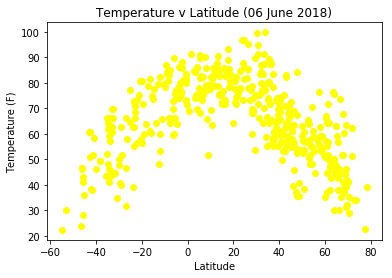

In [223]:
# temp vs lat

plt.scatter(weather_df['Latitude'], weather_df['Temperature'], color='yellow')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature v Latitude (06 June 2018)')
plt.savefig('temp_v_lat.png', bbox_inches='tight')

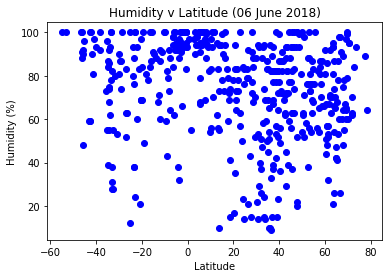

In [229]:
# humidity vs lat
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], color='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity v Latitude (06 June 2018)')
plt.savefig('humidity_v_lat.png', bbox_inches='tight')

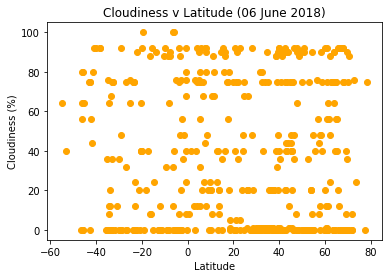

In [225]:
# cloudiness vs lat
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], color='orange')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness v Latitude (06 June 2018)')
plt.savefig('cloudiness_v_lat.png', bbox_inches='tight')

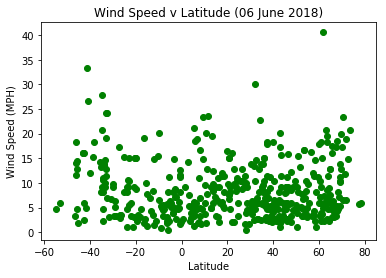

In [226]:
# wind speed vs lat
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], color='green')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Wind Speed v Latitude (06 June 2018)')
plt.savefig('wind_v_lat.png', bbox_inches='tight')